# PaddleOCR

`uv add paddleocr paddlepaddle`

In [1]:
from paddleocr import PaddleOCR

# 한국어 OCR 모델 로드
ocr = PaddleOCR(use_angle_cls=True, lang="korean")

# 테스트 이미지 (A4 볼펜 손글씨)
img_path = "C:/emotion_letter/app/tests/data/sample_letter3.jpg"

results = ocr.ocr(img_path)


if results and isinstance(results[0], dict):
    rec_texts = results[0]["rec_texts"]
    rec_scores = results[0]["rec_scores"]
    for text, score in zip(rec_texts, rec_scores):
        print(f"인식 결과: {text} (신뢰도 {score:.2f})")
else:
    print("OCR 결과 없음")

C:\Users\user\AppData\Local\Temp\ipykernel_28376\4251245419.py:4: DeprecationWarning: The parameter `use_angle_cls` has been deprecated and will be removed in the future. Please use `use_textline_orientation` instead.
  ocr = PaddleOCR(use_angle_cls=True, lang="korean")
c:\emotion_letter\.venv\Lib\site-packages\paddle\utils\cpp_extension\extension_utils.py:718: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\user\.paddlex\official_models\PP-LCNet_x1_0_doc_ori`.
Creating model: ('UVDoc', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\user\.paddlex\official_models\UVDoc`.
Creating mod

인식 결과: 누구에기 (신뢰도 0.79)
인식 결과: 안녕.나윤재야. 이건 OCR Test를 (신뢰도 0.83)
인식 결과: 위해쓰는 편지야 (신뢰도 0.68)
인식 결과: 윤재가- (신뢰도 0.95)


## 전체 구조

In [2]:
import pprint

pprint.pprint(results)

[{'doc_preprocessor_res': {'angle': 0,
                           'input_img': array([[[105, ..., 155],
        ...,
        [177, ..., 192]],

       ...,

       [[ 78, ..., 116],
        ...,
        [192, ..., 207]]], shape=(1261, 3024, 3), dtype=uint8),
                           'input_path': None,
                           'model_settings': {'use_doc_orientation_classify': True,
                                              'use_doc_unwarping': True},
                           'output_img': array([[[182, ..., 198],
        ...,
        [174, ..., 189]],

       ...,

       [[111, ..., 127],
        ...,
        [182, ..., 197]]], shape=(1261, 3024, 3), dtype=uint8),
                           'page_index': None,
                           'rot_img': array([[[105, ..., 155],
        ...,
        [177, ..., 192]],

       ...,

       [[ 78, ..., 116],
        ...,
        [192, ..., 207]]], shape=(1261, 3024, 3), dtype=uint8)},
  'dt_polys': [array([[ 85, 117],
       ...,
   

# 시각화

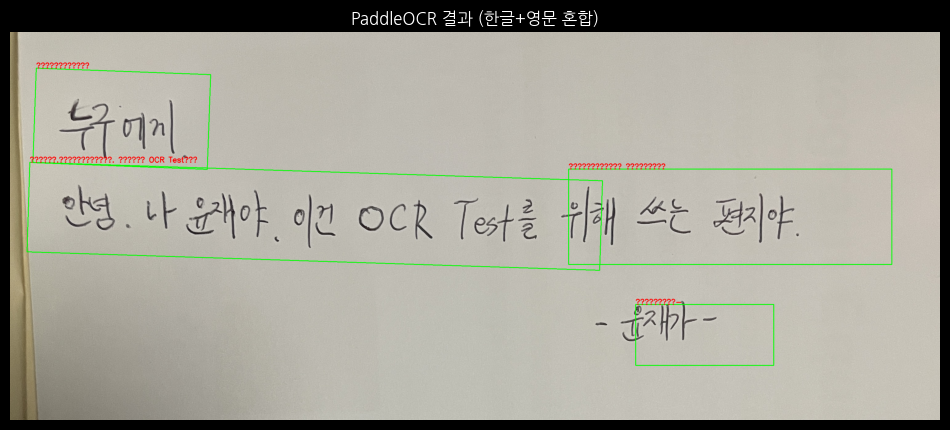

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

img = cv2.imread(results[0]["input_path"])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for box, text, score in zip(
    results[0]["rec_polys"], results[0]["rec_texts"], results[0]["rec_scores"]
):
    pts = np.array(box).astype(int)
    cv2.polylines(img, [pts], isClosed=True, color=(0, 255, 0), thickness=2)
    cv2.putText(img, text, tuple(pts[0]), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.title("PaddleOCR 결과 (한글+영문 혼합)")
plt.axis("off")
plt.show()